## 타이타닉 생존자 분석

* plotly_express install 필요

In [3]:
# !pip install plotly_express

In [4]:
# github url 이용하면 바로 데이터를 받아올 수 있음

import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial' + \
              '/master/dataset/titanic.xls'

titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 생존 상황

In [5]:
# requirement
import matplotlib.pyplot as plt
import seaborn as sns

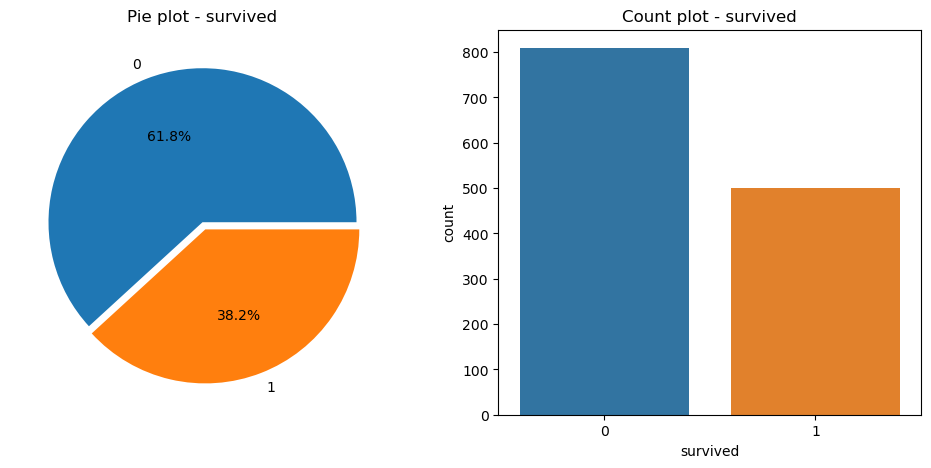

In [29]:
# 생존자 관련 그래프 생성

f, ax = plt.subplots(1, 2, figsize=(12,5))  # 한 번에 두개 이상의 plot을 보이고 싶을 때 사용, 내부 숫자는 표현하는 그래프 갯수 행/열 표시

titanic['survived'].value_counts().plot.pie(ax = ax[0], autopct='%1.1f%%', explode=[0, 0.05])

# autopct >> 숫자 표현 관련 명령 / shadow >> 그래프 명암 / explode >> 그래프 떨어뜨려 놓는 것

ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')

sns.countplot(x = 'survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

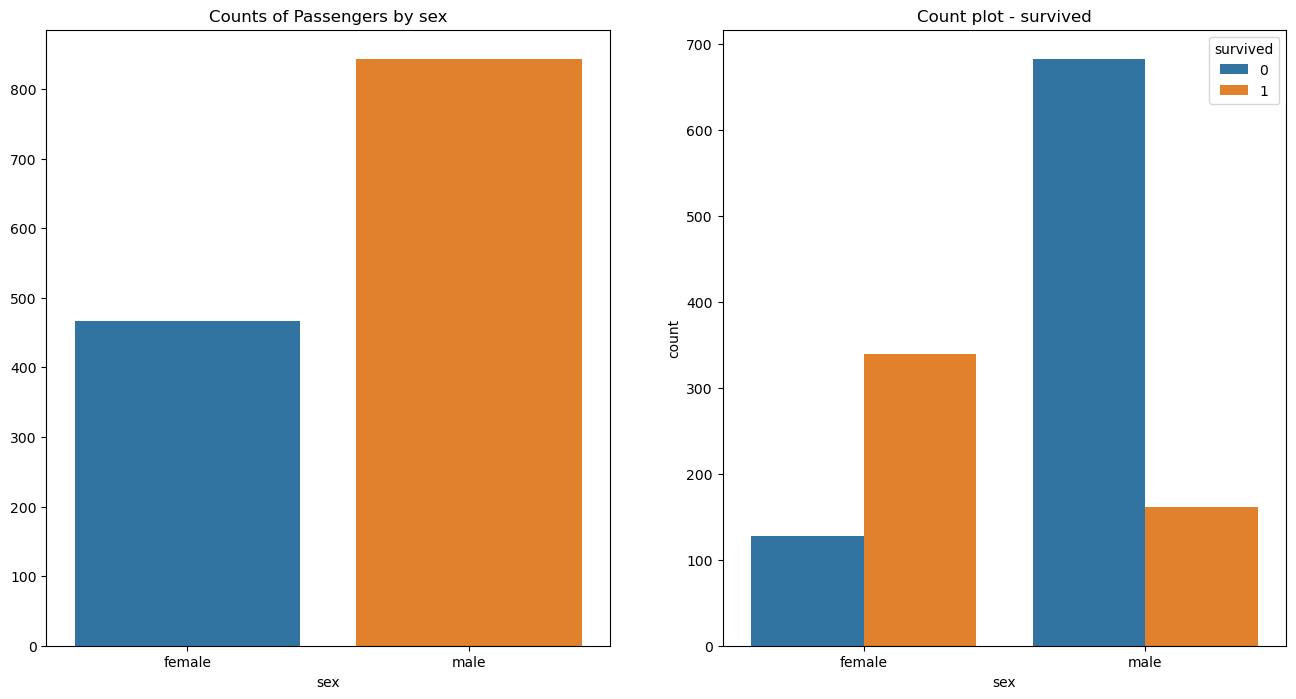

In [25]:
# 성별에 따른 생존 상황 확인

f, ax = plt.subplots(1, 2, figsize=(16,8))

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Counts of Passengers by sex')
ax[0].set_ylabel('')

sns.countplot(x = 'sex', data=titanic, hue='survived', ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

# 비율 상 여성은 탑승 인원 대비 80% 정도 생존하였고, 남성은 탑승 인원 대비 20% 정도 생존하였음
# 남성의 생존 확률이 낮았음을 볼 수 있음

In [31]:
# 경제력 대비 생존률

pd.crosstab(titanic['pclass'], titanic['survived'], margins=True) # margins >> 행/열 종합 집계

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


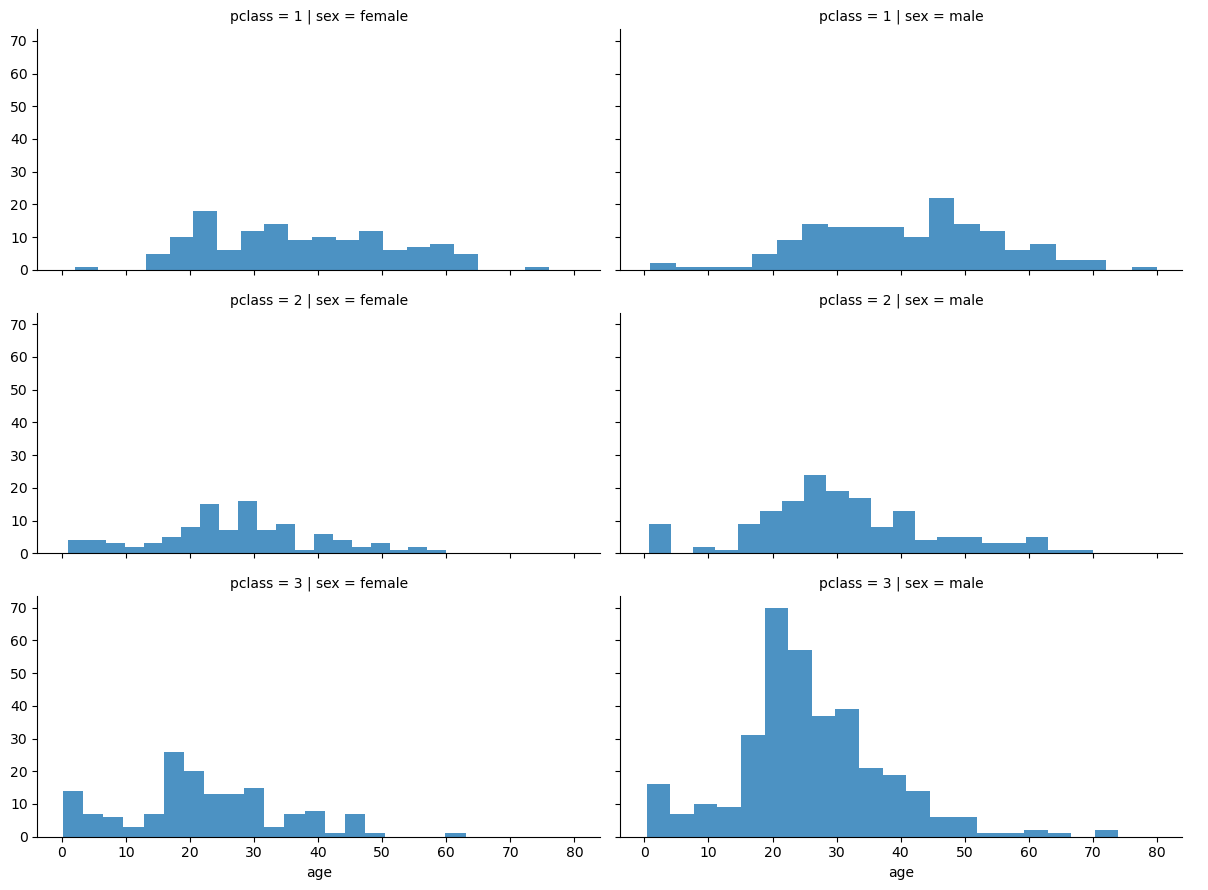

In [53]:
# 객실 등급 별 여성/남성 탑승자 수 확인

grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=3, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend();

In [37]:
# 나이별 탑승객 확인

import plotly.express as px

In [38]:
fig = px.histogram(titanic, x='age')
fig.show()

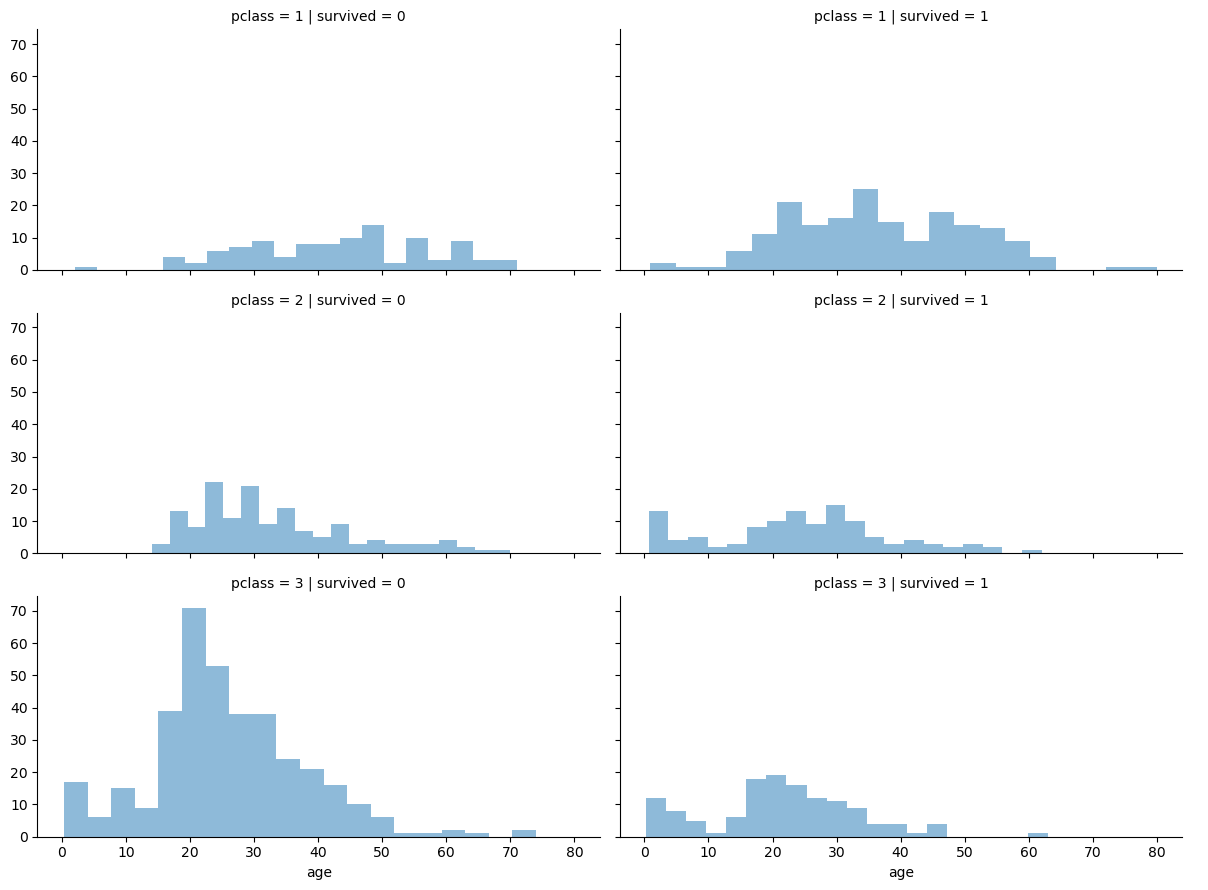

In [41]:
# 등실별 연령에 따른 생존률 확인

grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=3, aspect=2)
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
grid.add_legend();

In [44]:
# 연령대에 따른 카테고리 생성 및 데이터 프레임에 해당 카테고리 추가 (pd.cut 이용)

titanic['age_cat']= pd.cut(titanic['age'], bins=[0, 7, 15, 30, 60, 100],
                          include_lowest=True,
                          labels=['baby', 'teen', 'young', 'adult', 'senior'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


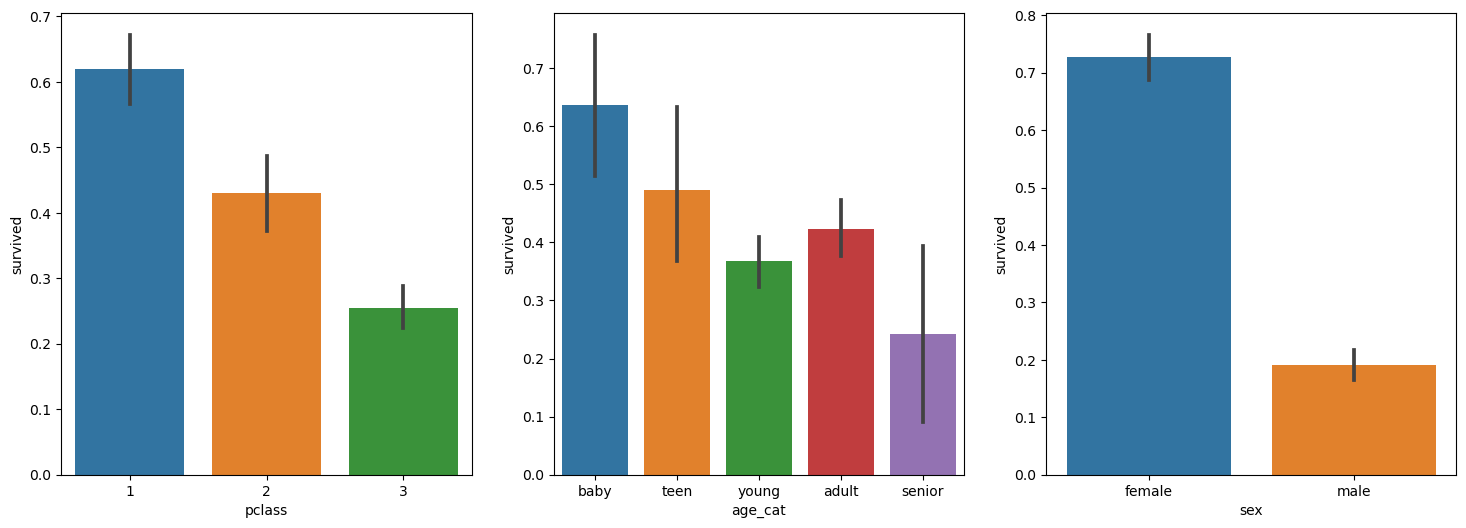

In [51]:
# 종합적으로 데이터 한 번에 파악하기

plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=titanic)  # 객실 등급에 따른 생존률

plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=titanic) # 연령대 별 생존률

plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic)     # 성별에 따른 생존률

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9512\4250634628.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_9512\4250634628.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_9512\4250634628.py:12: UserWarning:



`distplot` is a de

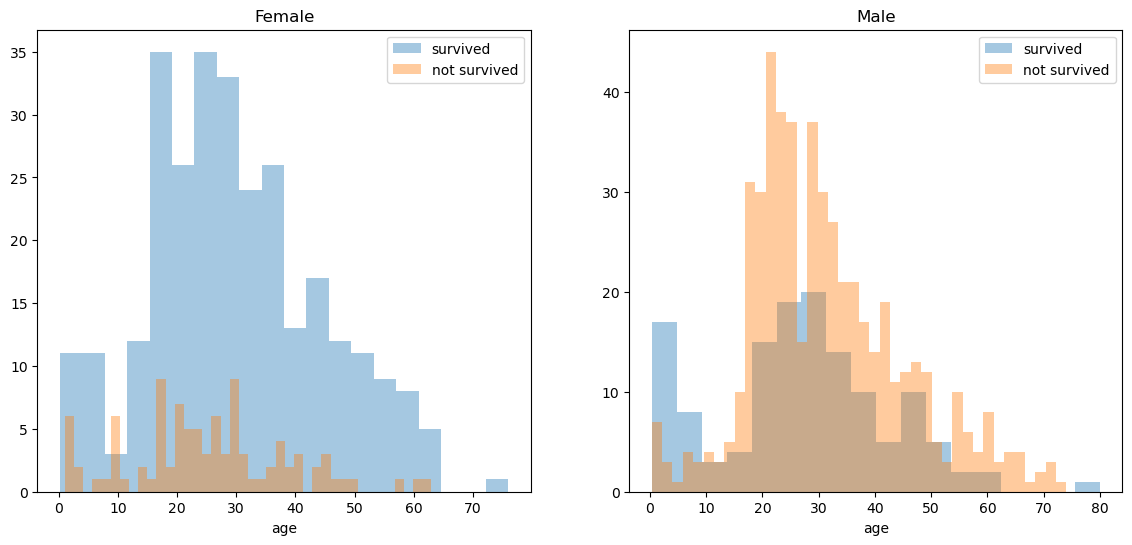

In [64]:
# 남 / 여 나이별 생존 상황

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 6))

women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

ax = sns.distplot(women[women['survived']==1]['age'], bins = 20, label='survived', ax=axes[0], kde=False)
ax = sns.distplot(women[women['survived']==0]['age'], bins = 40, label='not survived', ax=axes[0], kde=False)
ax.legend(); ax.set_title('Female')

ax = sns.distplot(men[men['survived']==1]['age'], bins = 18, label='survived', ax=axes[1], kde=False)
ax = sns.distplot(men[men['survived']==0]['age'], bins = 40, label='not survived', ax=axes[1], kde=False)
ax.legend(); ax.set_title('Male')

plt.show()

In [70]:
# 탑승객의 이름을 통해 사회적 신분 파악 가능
# titanic 데이터 프레임에 타이틀 데이터 만들어 집어넣기

import re

title=[]
for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [71]:
# 만든 데이터 프레임을 토대로 대략적인 집계

pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [76]:
# 분석에 용이하도록 다양한 타이틀을 간략화

titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Dr', 'Master', 'Jonkheer']

In [77]:
for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

In [78]:
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [79]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,1.000000
4,Rare_m,0.448276


### 머신 러닝 모델 구축

#### 1. 머신 러닝을 위해 기존 데이터 가공

In [80]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


In [81]:
# 성별이 숫자가 아니므로, 머신러닝을 위해 해당 부분을 숫자로 변경하여야 함.
# 먼저 바꾸고자 하는 성별을 LabelEncoder 이용하여 분류

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])

LabelEncoder()

In [86]:
le.classes_

array(['female', 'male'], dtype=object)

In [84]:
# LabelEncoder 이용하여 성별을 숫자로 변형하고 데이터프레임에 추가

titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [87]:
# 결측치 포기 (나이, 요금이 확인되지 않은 승객들이 존재)

titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 135.9+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_9512\141404708.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

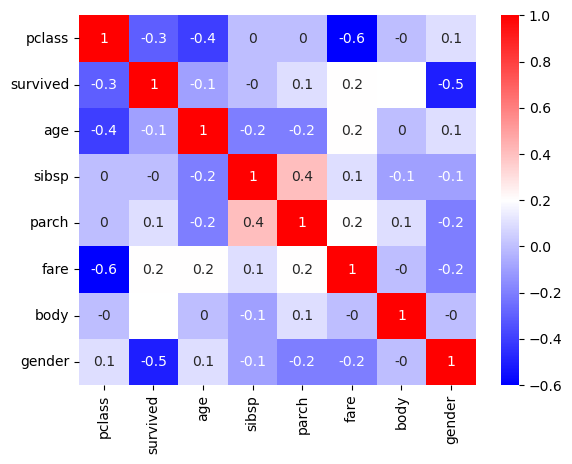

In [92]:
# 상관계수 확인

correlation_matrix = titanic.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

#### 2. 머신러닝 모델 구축

In [93]:
# 열 이름 확인

titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'age_cat',
       'title', 'gender'],
      dtype='object')

In [94]:
# 과적합 회피를 위한 훈련/검증 데이터셋 구분

from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=13)

In [95]:
# Decision Tree 생성 >> 위에서 만든 훈련 데이터 셋 이용

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [109]:
# 검증 데이터 셋을 이용하여 만들어진 모델의 정확도 확인

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


In [108]:
# 전체 데이터 셋을 이용하여 만들어진 모델 정확도 확인

pred = dt.predict(X)
print(accuracy_score(y, pred))

0.7818181818181819


In [103]:
# 특정 인원을 새로 만들어 생존 확률을 예측해보자 (예시 = 타이타닉 영화 속 디카프리오의 역할)
# ['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']

import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print('Dicaprio :', dt.predict_proba(dicaprio))

# 사망 확률: 77%, 생존 확률: 23%
# 생존 확률만 보이고 싶다면 dt.predict_proba(dicaprio)[0, 1]

Dicaprio : [[0.7704918 0.2295082]]


c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [106]:
winslet  = np.array([[1, 16, 1, 1, 100, 0]])
print('Winslet :', dt.predict_proba(winslet)[0, 1])

# 사망확률: 0%, 생존 확률: 100%

Winslet : 1.0


c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

